# Principal Component Analysis On Cancer Data
In this notebook on principal component analysis, I am gonna go through the entire process of pca using **scikit-learn** library. PCA is an **unsupervised learning** algorithm and it's often used before any supervised learning algorithm. PCA transform the higher dimension data into specified or lower dimensional space. To read more about PCA in scikit-learn click [here](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).<br>
<br>To know more about PCA click [here](https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/).

In [34]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline
sns.set_style('darkgrid')

### Loading dataset
Cancer dataset is available in scikit learn library, so we're going load it from scikit learn datasets.

In [35]:
cancer = datasets.load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [37]:
print('Feature names in dataset:')
print(cancer['feature_names'])
print('\n')
print('Target names in dataset:')
print(cancer['target_names'])

Feature names in dataset:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Target names in dataset:
['malignant' 'benign']


### Creating pandas dataframe of datasets

In [5]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Scaling Data
In scaling, you're changing the range of your data while in normalization you're changing the shape of the distribution of your data.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

## PCA Model

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)

In [9]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
X_pca = pca.transform(scaled_data)

In [13]:
print('Shape of our transformed data = {}'.format(X_pca.shape))
print("We've decomposed the data from 30 columns to 2 columns")

Shape of our transformed data = (569, 2)
We've decomposed the data from 30 columns to 2 columns


### Scatter plot of transformed data

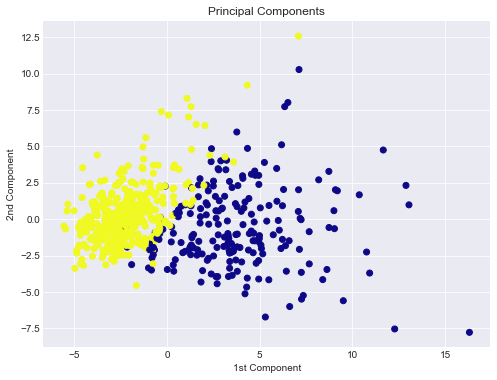

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=cancer['target'], cmap='plasma');
plt.title('Principal Components');
plt.xlabel('1st Component');
plt.ylabel('2nd Component');

In [26]:
df_components = pd.DataFrame(pca.components_, columns=cancer['feature_names'])
df_components

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


#### Heatmap of principal componnents of data

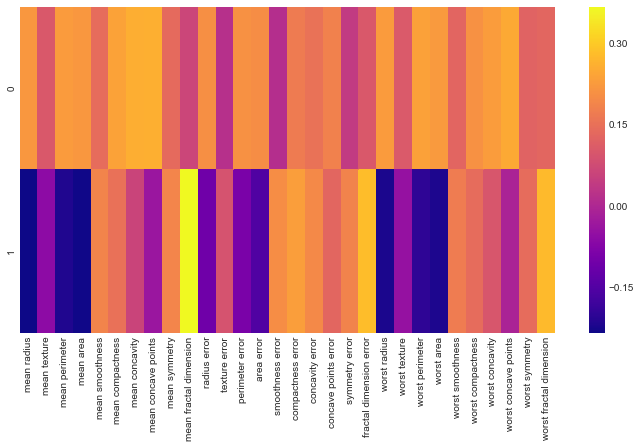

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(df_components, cmap='plasma');